In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import itertools
import matplotlib.ticker as mticker
from scipy.optimize import brentq, curve_fit
from mpmath import zeta
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from matplotlib.ticker import (LinearLocator, MaxNLocator)

font = {'weight': 'normal', 'family': 'DejaVu Sans'}
plt.rc('text', usetex = True)
plt.rc('font', **font)
plt.rcParams['font.size'] = 24

def func(x, a):
    return a*x

def format_power(x):
    
    power = int("{:.2e}".format(x).split('e')[1])
    val = float("{:.2e}".format(x).split('e')[0])
    
    return r'%.2f \cdot 10^{%d}' % (val, power)

def load_data_popdyn():
    
    data = np.load('popdyn_model_data.npz', 
                    allow_pickle = True)

    return (data['sigvar'], data['time_hists'], 
            data['size_hists'], data['traces'], 
            data['dim'], data['beta_example'],
            data['lambda_example'])

def load_data_lifetime():
    
    data = np.load('popdyn_scaling_lifetime_data.npz', 
                    allow_pickle = True)
    
    return (data['sigvar_a'], data['q'], data['params'],
            data['alphas'])

def load_data_size():
    
    data = np.load('popdyn_scaling_size_data.npz', 
                    allow_pickle = True)
    
    return (data['sigvar_a'], data['q'], data['params'],
            data['betas'])


def load_data_sketch():
    
    data = np.load('sketch_data.npz', 
                    allow_pickle = True)
    
    return (data['xp'], data['xv'], data['n_traj'], data['sigv'],
            data['gamma'], data['nu'],)


def load_data_dimlifetime():
    
    data = np.load('popdyn_scaling_dimlifetime_data.npz', 
                    allow_pickle = True)
    
    return (data['sigvar'], data['q'], data['params'],
            data['alphas'], data['nu'], data['gamma'])

def load_data_dimsize():
    
    data = np.load('popdyn_scaling_dimsize_data.npz', 
                    allow_pickle = True)
    
    return (data['sigvar'], data['q'], data['params'],
            data['betas'], data['nu'], data['gamma'])


def save_fig(figs, figname):

    
    if (type(figs) is list):
        for q, fig in enumerate(figs):
            fig.savefig('%s_%d.svg' % (figname, q), bbox_inches = 'tight')
            fig.savefig('%s_%d.pdf' % (figname, q), bbox_inches = 'tight')
            fig.savefig('%s_%d.png' % (figname, q), bbox_inches = 'tight', dpi = 300)
    else:
        figs.savefig('%s.svg' % (figname), bbox_inches = 'tight')
        figs.savefig('%s.pdf' % (figname), bbox_inches = 'tight')
        figs.savefig('%s.png' % (figname), bbox_inches = 'tight', dpi = 300)

def set_size(w,h,ax):
    Bbox = ax.get_position()
        
    l = Bbox.x0
    r = Bbox.x1
    t = Bbox.y1
    b = Bbox.y0

    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
    

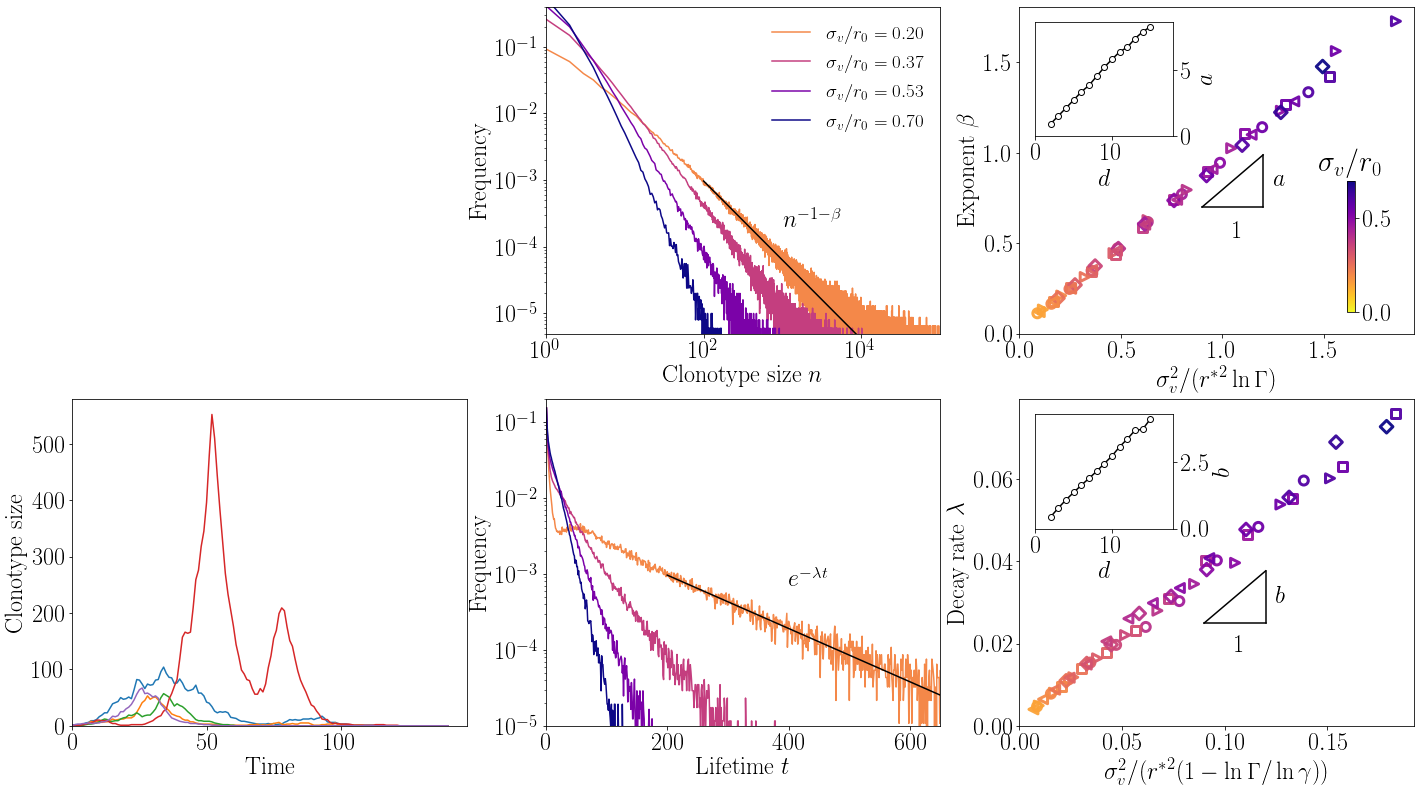

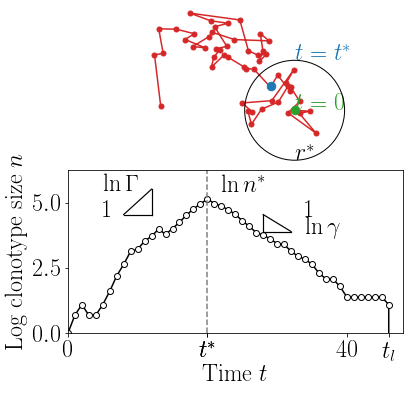

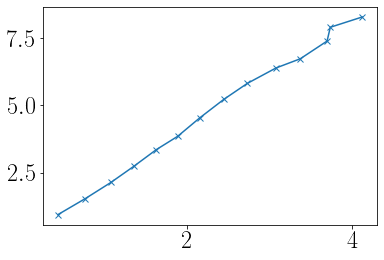

In [3]:
j0 = np.array([(np.pi)/2, 2.4048, np.pi, 3.83171, 4.49341, 5.13562, 5.76346, 6.38016, 6.98793, 7.58834,
               8.1825, 8.7714, 9.3558, 9.9361, 10.5128, 11.0863, 11.6570, 12.2250, 12.7907, 13.3543])


fig_a, ((ax_cartoon, ax3, ax4), (ax2, ax0, ax1)) = plt.subplots(ncols = 3, nrows = 2)
set_size(5.48, 4.54, ax1)

(xp, xv, n_traj, 
 sigv, gamma, nu) = load_data_sketch()

fig_cartoon, (ax1_cartoon, ax2_cartoon) = plt.subplots(figsize = (6, 6), ncols = 1, nrows = 2)
fig_cartoon.subplots_adjust(hspace = 0)

length = min(55, len(xv[:,0]))

xv = xv[:length, :][::1]
xp = xp[:length, :][::1]
n_traj = n_traj[:length][::1]

dx = xv[0,0]
dy = xv[0,1]

ax1_cartoon.plot(-(xv[:,1] - dy), -(xv[:,0] - dx),
                 'o-', markersize = 5, color = 'C3')

immune_mem = plt.Circle((0, 0), 1, 
                        facecolor = 'None', 
                        edgecolor = 'k',
                        zorder = 9)

ymin = min(np.min(-xv[:,0] + dx) - 0.01, -1.2)

ax1_cartoon.axis('equal')
ax1_cartoon.set_ylim(ymin = ymin)

ax1_cartoon.add_artist(immune_mem)
ax1_cartoon.set_yticks([])

ax1_cartoon.spines['left'].set_visible(False)
ax1_cartoon.spines['top'].set_visible(False)
ax1_cartoon.spines['right'].set_visible(False)
ax1_cartoon.spines['bottom'].set_visible(False)
ax1_cartoon.set_xticks([])

traj = np.append(np.log(n_traj[n_traj > 0]), -1)
time = np.append(np.arange(0, len(n_traj[n_traj > 0])), 
                 len(n_traj[n_traj > 0]) - 1)
ax2_cartoon.plot(time, traj, '-o', markersize = 6,
         markerfacecolor = 'w', color = 'k')

ax2_cartoon.set_ylabel('Log clonotype size $n$')
ax2_cartoon.set_xlabel('Time $t$')


fig_cartoon.canvas.draw()

tstar = int(np.argmax(n_traj).flatten())
tl = int(np.max(np.argwhere(n_traj > 0)))
nstar = np.max(n_traj)

ax1_cartoon.plot(xv[0,0] - dx, xv[0,1] - dy, 
                 'o-', markersize = 8.5, color = 'C2')
ax1_cartoon.plot(xv[tstar,0] - dx, xv[tstar,1] - dy, 
                 'o-', markersize = 8.5, color = 'C0')

ax1_cartoon.annotate(r'$t = 0$', (0, 0), color = 'C2')
ax1_cartoon.annotate(r'$t = t^*$', (0, 1), color = 'C0')
ax1_cartoon.annotate(r'$r^*$', (0, -1), color = 'k')

xticks = list(ax2_cartoon.get_xticks())
xticks_labels = [w.get_text() for w in ax2_cartoon.get_xticklabels()]

xticks_labels += [r'$t^{*}$', r'$t_l$']

xticks += [tstar, tl]

ax2_cartoon.set_xticks(xticks)
ax2_cartoon.set_xticklabels(xticks_labels)
ax2_cartoon.axvline(x = tstar, linestyle = '--', color ='grey')
ax2_cartoon.annotate(r'$\ln n^*$', (tstar + 2, np.log(nstar*1.25)))

ax2_cartoon.set_ylim(ymin = 0, ymax = np.log(nstar*3))
ax2_cartoon.set_xlim(xmin = 0, xmax = tl + 2)
                    
Gamma = gamma*(1 + nu)
ypos = 0.55*nstar
xpos = tstar - 8
ax2_cartoon.plot([xpos - 4, xpos], [np.log(ypos), np.log(ypos*(gamma*(1 + nu))**4)], 'k-', linewidth = 1.2)
ax2_cartoon.plot([xpos, xpos], [np.log(ypos), np.log(ypos*Gamma**4)], 'k-', linewidth = 1.2)
ax2_cartoon.plot([xpos - 4, xpos], [np.log(ypos), np.log(ypos)], 'k-', linewidth = 1.2)
ax2_cartoon.annotate(r'$\ln \Gamma$', (xpos - 7, np.log(0.9*ypos*Gamma**4)))
ax2_cartoon.annotate(r'$1$', (xpos - 7, np.log(0.9*ypos)))


ypos = 0.55*nstar
xpos = tstar + 12
ax2_cartoon.plot([xpos - 4, xpos], [np.log(ypos), np.log(ypos*gamma**4)], 'k-', linewidth = 1.2)
ax2_cartoon.plot([xpos - 4, xpos - 4], [np.log(ypos), np.log(ypos*gamma**4)], 'k-', linewidth = 1.2)
ax2_cartoon.plot([xpos - 4, xpos], [np.log(ypos*gamma**4), np.log(ypos*(gamma)**4)], 'k-', linewidth = 1.2)
ax2_cartoon.annotate(r'$\ln \gamma$', (xpos + 2, np.log(0.9*ypos*gamma**4)))
ax2_cartoon.annotate(r'$1$', (xpos + 2, np.log(0.9*ypos)))

(sigvar, time_hists, 
 size_hists, traces, dim,
 beta_example, lambda_example) = load_data_popdyn()

size_hists = size_hists[::-1]
time_hists = time_hists[::-1]

nsigv = len(sigvar)
num_traces = 5
max_val = 200
choosen_traces = traces[np.random.choice(len(traces), num_traces, replace = False),:]
max_val = np.max(np.argwhere(choosen_traces > 0)[:,1])

for i in range(num_traces):
    ax2.plot(choosen_traces[i,:max_val + 20], '-')

ax2.set_xlabel('Time')
ax2.set_ylabel('Clonotype size')
ax2.set_xlim(xmin = 0)
ax2.set_ylim(ymin = 0)

(sigvar_a, q, params,
 betas) = load_data_size()
nparams = len(params[:,0])

cmap_sigv = sns.color_palette("plasma_r", as_cmap = True)
norm = mpl.colors.Normalize(vmin  = 0, vmax = np.max(sigvar_a.flatten()))


Gamma = params[:,1]*(1 + params[:,0])
u = np.log(Gamma)
r_star = np.log(params[:,0]*params[:,1]/(1 - params[:,1]))**(1/q)

markers = ['o', 's', '>', 'D', '<', '^']

axins4 = inset_axes(ax4,
                    width="2%",
                    height="40%",
                    loc = 'lower right',
                    bbox_to_anchor =  (-0.12, 0.03, 1., 1.),
                    bbox_transform = ax4.transAxes)

axins4.set_title(r'$\sigma_v/r_0$', pad = 11)

axins4_slopes = inset_axes(ax4,
                        width="35%",
                        height="35%",
                        loc = 'upper left',
                        bbox_to_anchor =  (+0.01, -0.01, 1., 1.),
                        bbox_transform = ax4.transAxes)

axins4_slopes.set_ylabel(r'$a$')
axins4_slopes.set_xlabel(r'$d$')
axins4_slopes.yaxis.set_ticks_position('right')
axins4_slopes.yaxis.set_label_position('right')

slope_a = np.zeros(nparams)

for j in range(nparams):

    sigv = sigvar_a[j,:]
    dim = params[j,0]
    a = ax4.scatter((sigv/r_star[j])**2/(u[j]),
                betas[j,:] - 1, s = 9**2, c = sigv, cmap = cmap_sigv,
                marker = markers[j], alpha = 0.95, lw = 3, norm = norm)
    
    a.set_facecolor('none')
    
    slope_a[j], _ = curve_fit(func, (sigv/r_star[j])**2/(u[j]), betas[j,:] - 1)


#vals = ((sigvar_a/r_star[:,np.newaxis])**2/u[:,np.newaxis]).flatten()
#ax4.plot(vals.flatten(), np.mean(slope_a)*vals, color = 'grey', 
#         linestyle = '-', alpha = 0.8, zorder = 0)
xpos = 1.2
ypos = 0.7
ax4.plot(xpos*np.ones(2), [ypos, ypos + 0.3*np.mean(slope_a)], 'k-')
ax4.plot([xpos,xpos - 0.3], ypos*np.ones(2), 'k-')
ax4.plot([xpos,xpos - 0.3], [ypos + 0.3*np.mean(slope_a), ypos], 'k-')

ax4.annotate(r'$a$', (xpos + 0.05, ypos + 0.12))
ax4.annotate(r'$1$', (xpos - 0.15, ypos - 0.17))
             
ax4.set_xlabel(r'$\sigma_v^2 /({r^*}^2 \ln \Gamma)$')
ax4.set_ylabel(r'Exponent $\beta$')
ax4.set_xlim(xmin = 0)
ax4.set_ylim(ymin = 0)

cb1 = mpl.colorbar.ColorbarBase(axins4, cmap = cmap_sigv,
                                norm = norm,
                                orientation = 'vertical')

#axins4.yaxis.set_major_locator(MaxNLocator(3))

for k in range(nsigv):
    
    hist, center = size_hists[k]
    sigv = sigvar[k]
    ax3.plot(center, hist, '-', linewidth = 1.5, label = r'$\sigma_v/r_0 = %.2f$' % (sigv),
            color = cmap_sigv(norm(sigv)))

ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim([5e-6, 0.4])
ax3.set_xlim([1, 1e5])
ax3.set_xlabel(r'Clonotype size $n$')
ax3.set_ylabel('Frequency')
ax3.annotate(r'$n^{-1-\beta}$', (1*10**(3), 2*10**(-4)))

xmin = 100
xplaw = np.logspace(np.log10(xmin), np.log10(10**4), 20)
ax3.plot(xplaw, 0.23*xplaw**(-beta_example), 'k-')

ax3.legend(frameon = False, loc = 'upper right',
           fontsize = 19)


(sigvar_a, q, params,
 alphas) = load_data_lifetime()
nparams = len(params[:,0])

Gamma = params[:,1]*(1 + params[:,0])
u = 1 - np.log(Gamma)/np.log(params[:,1])
r_star = np.log(params[:,0]*params[:,1]/(1 - params[:,1]))**(1/q)

markers = ['o', 's', '>', 'D', '<', '^']


#axins1 = inset_axes(ax1,
#                   width="2%",
#                    height="40%",
#                    loc = 'lower right',
#                    bbox_to_anchor =  (-0.09, 0.03, 1., 1.),
#                    bbox_transform = ax1.transAxes)

#axins1.set_title(r'$\sigma_v/r_0$', pad = 11)

axins1_slopes = inset_axes(ax1,
                        width="35%",
                        height="35%",
                        loc = 'upper left',
                        bbox_to_anchor =  (+0.01, -0.01, 1., 1.),
                        bbox_transform = ax1.transAxes)

axins1_slopes.set_ylabel(r'$b$')
axins1_slopes.set_xlabel(r'$d$')
axins1_slopes.yaxis.set_ticks_position('right')
axins1_slopes.yaxis.set_label_position('right')

for j in range(nparams):
    
    sigv = sigvar_a[j,:]
    dim = params[j,0]
    a = ax1.scatter((sigv/r_star[j])**2/(u[j]),
                alphas[j,:], s = 9**2, c = sigv, cmap = cmap_sigv,
                marker = markers[j], alpha = 0.95, lw = 3, norm = norm)
    
    a.set_facecolor('none')

    slope_a[j], _ = curve_fit(func, (sigv/r_star[j])**2/(u[j]), alphas[j,:])


ax1.set_xlabel(r'$\sigma_v^2 /({r^*}^2 ( 1 - \ln \Gamma/\ln \gamma))$')
ax1.set_ylabel(r'Decay rate $\lambda$')
ax1.set_xlim(xmin = 0)
ax1.set_ylim(ymin = 0)

xpos = 0.12
ypos = 0.025
ax1.plot(xpos*np.ones(2), [ypos, ypos + 0.03*np.mean(slope_a)], 'k-')
ax1.plot([xpos,xpos - 0.03], ypos*np.ones(2), 'k-')
ax1.plot([xpos,xpos - 0.03], [ypos + 0.03*np.mean(slope_a), ypos], 'k-')

ax1.annotate(r'$b$', (xpos + 0.005, ypos + 0.005))
ax1.annotate(r'$1$', (xpos - 0.015, ypos - 0.007))
             
    
#cb1 = mpl.colorbar.ColorbarBase(axins1, cmap = cmap_sigv,
#                                norm = norm,
#                                orientation = 'vertical')
#axins1.yaxis.set_major_locator(MaxNLocator(3))

for k in range(nsigv):
    
    hist, center = time_hists[k]
    sigv = sigvar[k]
    ax0.plot(center, hist, '-', linewidth = 1.5, label = r'$\sigma_v/r_0 = %.2f$' % (sigv),
             color = cmap_sigv(norm(sigv)))

ax0.set_yscale('log')
ax0.set_xlabel(r'Lifetime $t$')
ax0.set_ylabel('Frequency')
ax0.set_xlim([0, 650])
ax0.set_ylim([1*1e-5, 0.2])
ax0.annotate(r'$e^{-\lambda t}$', (400, 7*10**(-4)))

xmin = 200
xexp = np.linspace(xmin, 1000)
ax0.plot(xexp, np.exp(-lambda_example[0]*(xexp - lambda_example[1])), 'k-')


ax_cartoon.axis('off')


(sigvar, q, params,
 betas, nu, gamma) = load_data_dimsize()
nparams = len(params)

Gamma = gamma*(1 + nu)
u = np.log(Gamma)
r_star = np.log(gamma*nu/(1 - gamma))**(1/q)

slopes = np.zeros(nparams)

for j in range(nparams):
    
    dim = params[j]
    _sigvar = sigvar*j0[1]**2/2/(j0[dim - 1]**2/dim)
    slopes[j], _ = curve_fit(func, (_sigvar/r_star)**2/(u), betas[j,:] - 1)


axins4_slopes.plot(params, slopes, 'ko', markerfacecolor = 'w', linestyle = '-')
axins4_slopes.set_xlim(xmin = 0, xmax = 18)
axins4_slopes.set_ylim(ymin = 0)

slopes_1 = np.copy(slopes)

(sigvar, q, params,
 alphas, nu, gamma) = load_data_dimlifetime()
nparams = len(params)
Gamma = gamma*(1 + nu)
u = 1 - np.log(Gamma)/np.log(gamma)
r_star = np.log(gamma*nu/(1 - gamma))**(1/q)

slopes = np.zeros(nparams)

for j in range(nparams):
    
    dim = params[j]
    _sigvar = sigvar*j0[1]**2/2/(j0[dim - 1]**2/dim)
    slopes[j], _ = curve_fit(func, (_sigvar/r_star)**2/(u), alphas[j,:])


axins1_slopes.plot(params, slopes, 'ko', markerfacecolor = 'w', linestyle = '-')
axins1_slopes.set_xlim(xmin = 0, xmax = 18)
axins1_slopes.set_ylim(ymin = 0)

plt.show()


save_fig(fig_a, 'fig3')
save_fig(fig_cartoon, 'fig_cartoon')

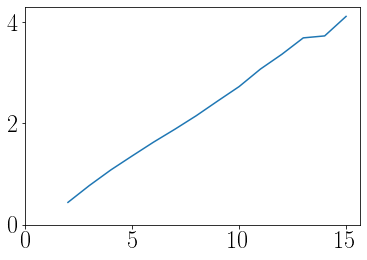

In [12]:
plt.figure()
plt.plot(params, slopes)
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
plt.show()